In [5]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

/tmp/ipykernel_38702/3915802764.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


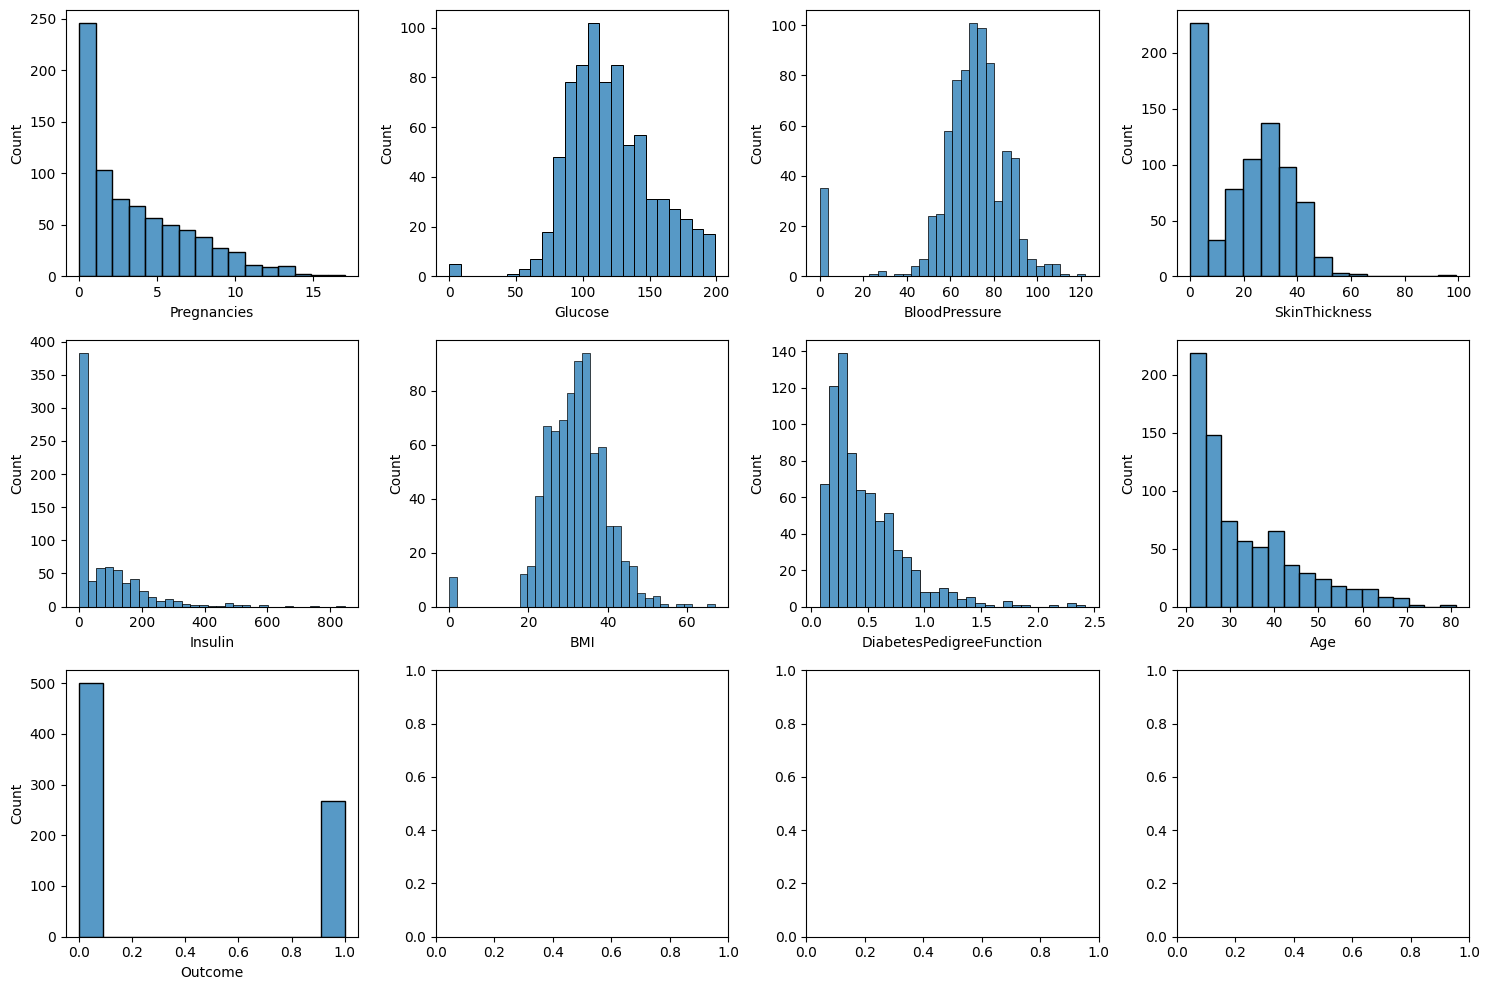

In [9]:
#Analysis on categorical variables

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 4, figsize=(15, 10))


sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness")
sns.histplot(ax=axis[1, 0], data=total_data, x="Insulin")
sns.histplot(ax=axis[1, 1], data=total_data, x="BMI")
sns.histplot(ax=axis[1, 2], data=total_data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[1, 3], data=total_data, x="Age")
sns.histplot(ax=axis[2, 0], data=total_data, x="Outcome")  # Ajustado el índice aquí


plt.tight_layout()


plt.show()

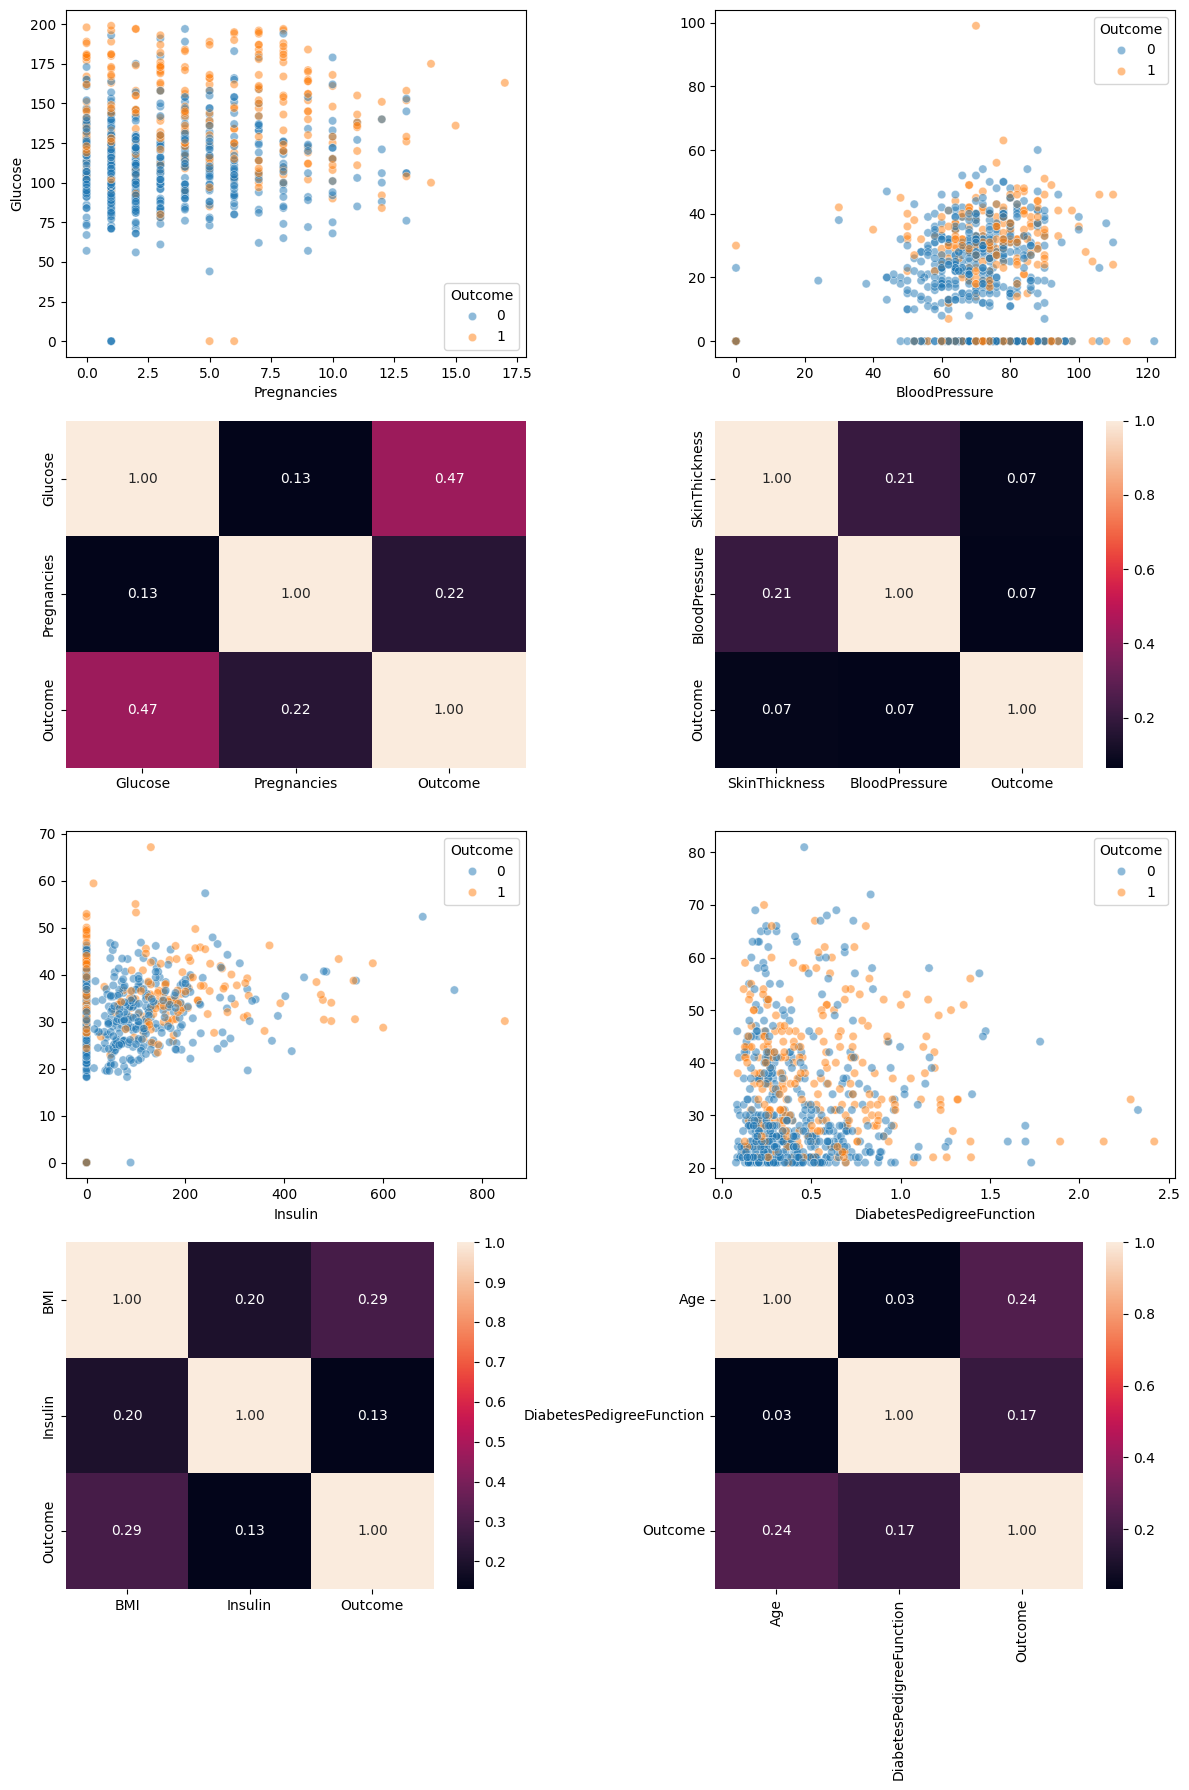

In [10]:
# Numerical - Numerical Analysis


fig, axis = plt.subplots(4, 2, figsize=(12, 18))


sns.scatterplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Glucose", hue="Outcome", alpha=0.5)
sns.heatmap(total_data[["Glucose", "Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.scatterplot(ax=axis[0, 1], data=total_data, x="BloodPressure", y="SkinThickness", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["SkinThickness", "BloodPressure", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.scatterplot(ax=axis[2, 0], data=total_data, x="Insulin", y="BMI", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["BMI", "Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)

sns.scatterplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction", y="Age", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["Age", "DiabetesPedigreeFunction", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

plt.tight_layout()

plt.show()

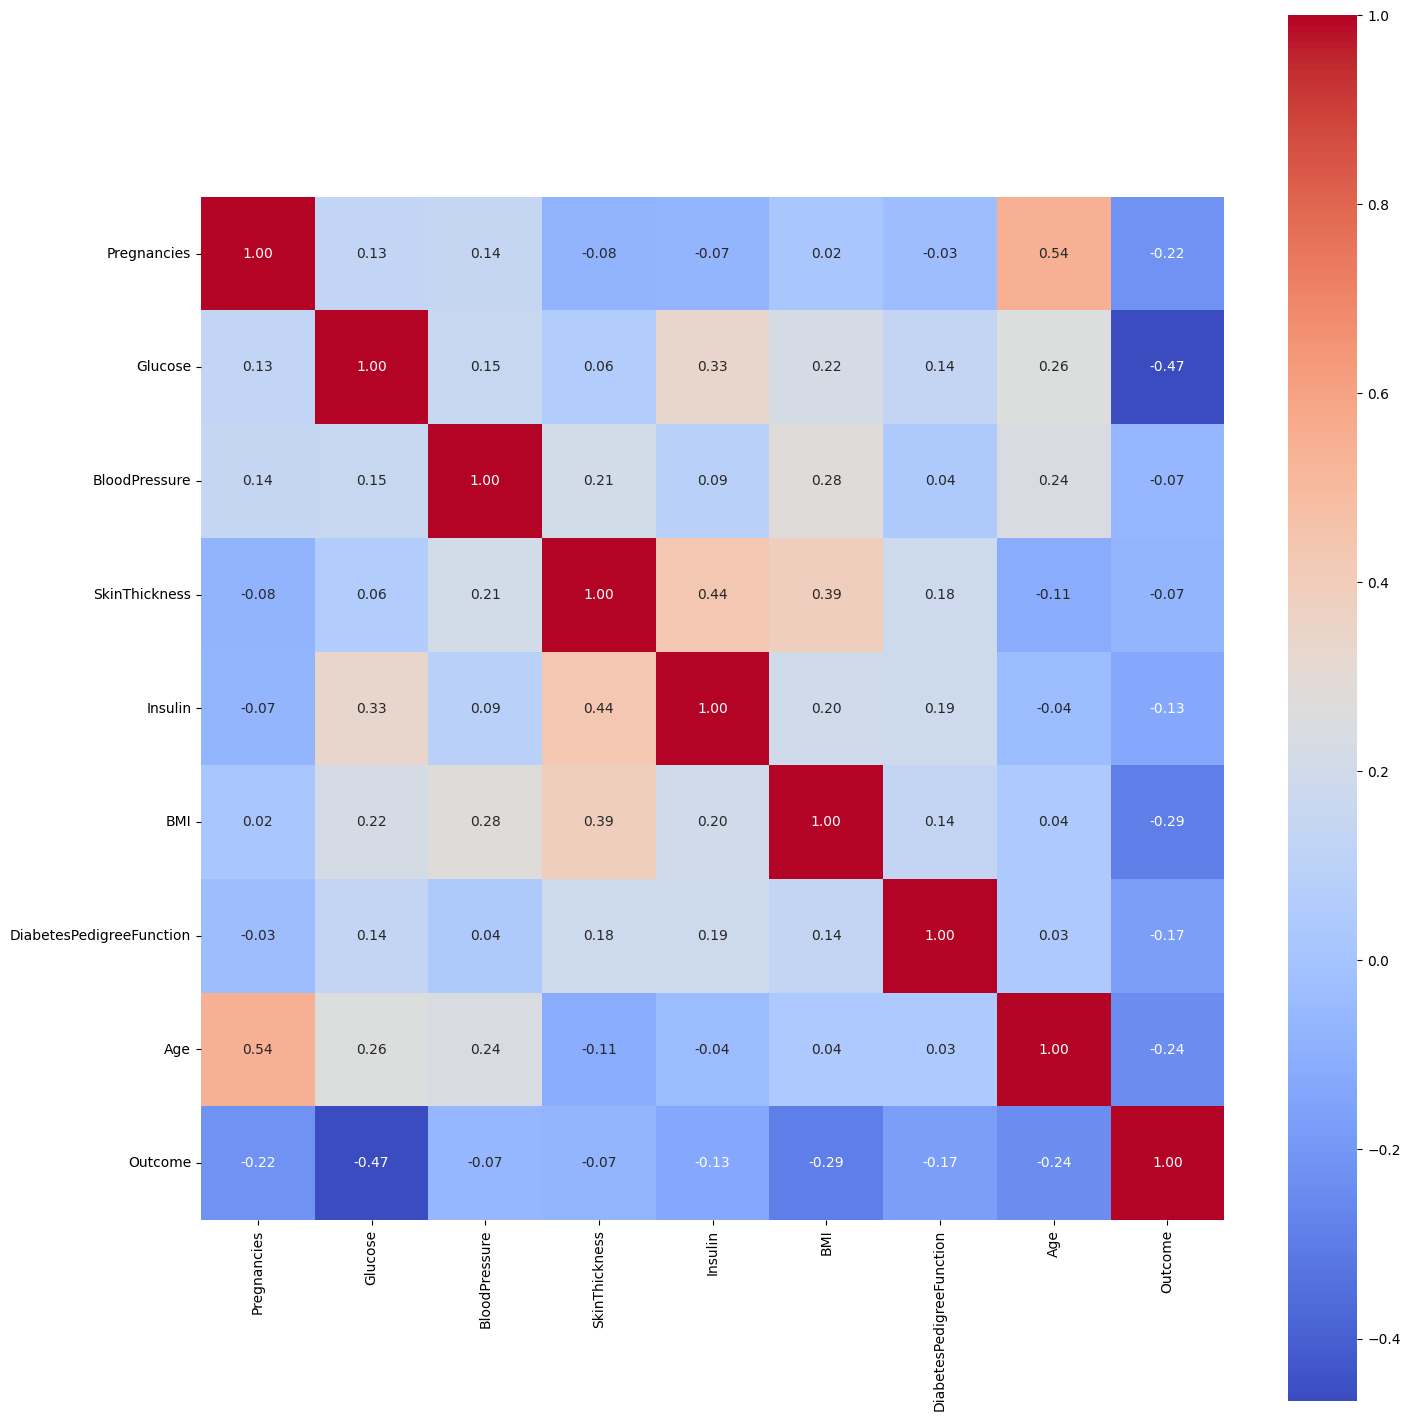

In [11]:
# Numerical-categorical analysis (complete)

total_data["Outcome"] = pd.factorize(total_data["Outcome"])[0]


fig, axes = plt.subplots(figsize=(15, 15))


correlation_matrix = total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                                 "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)


plt.tight_layout()


plt.show()

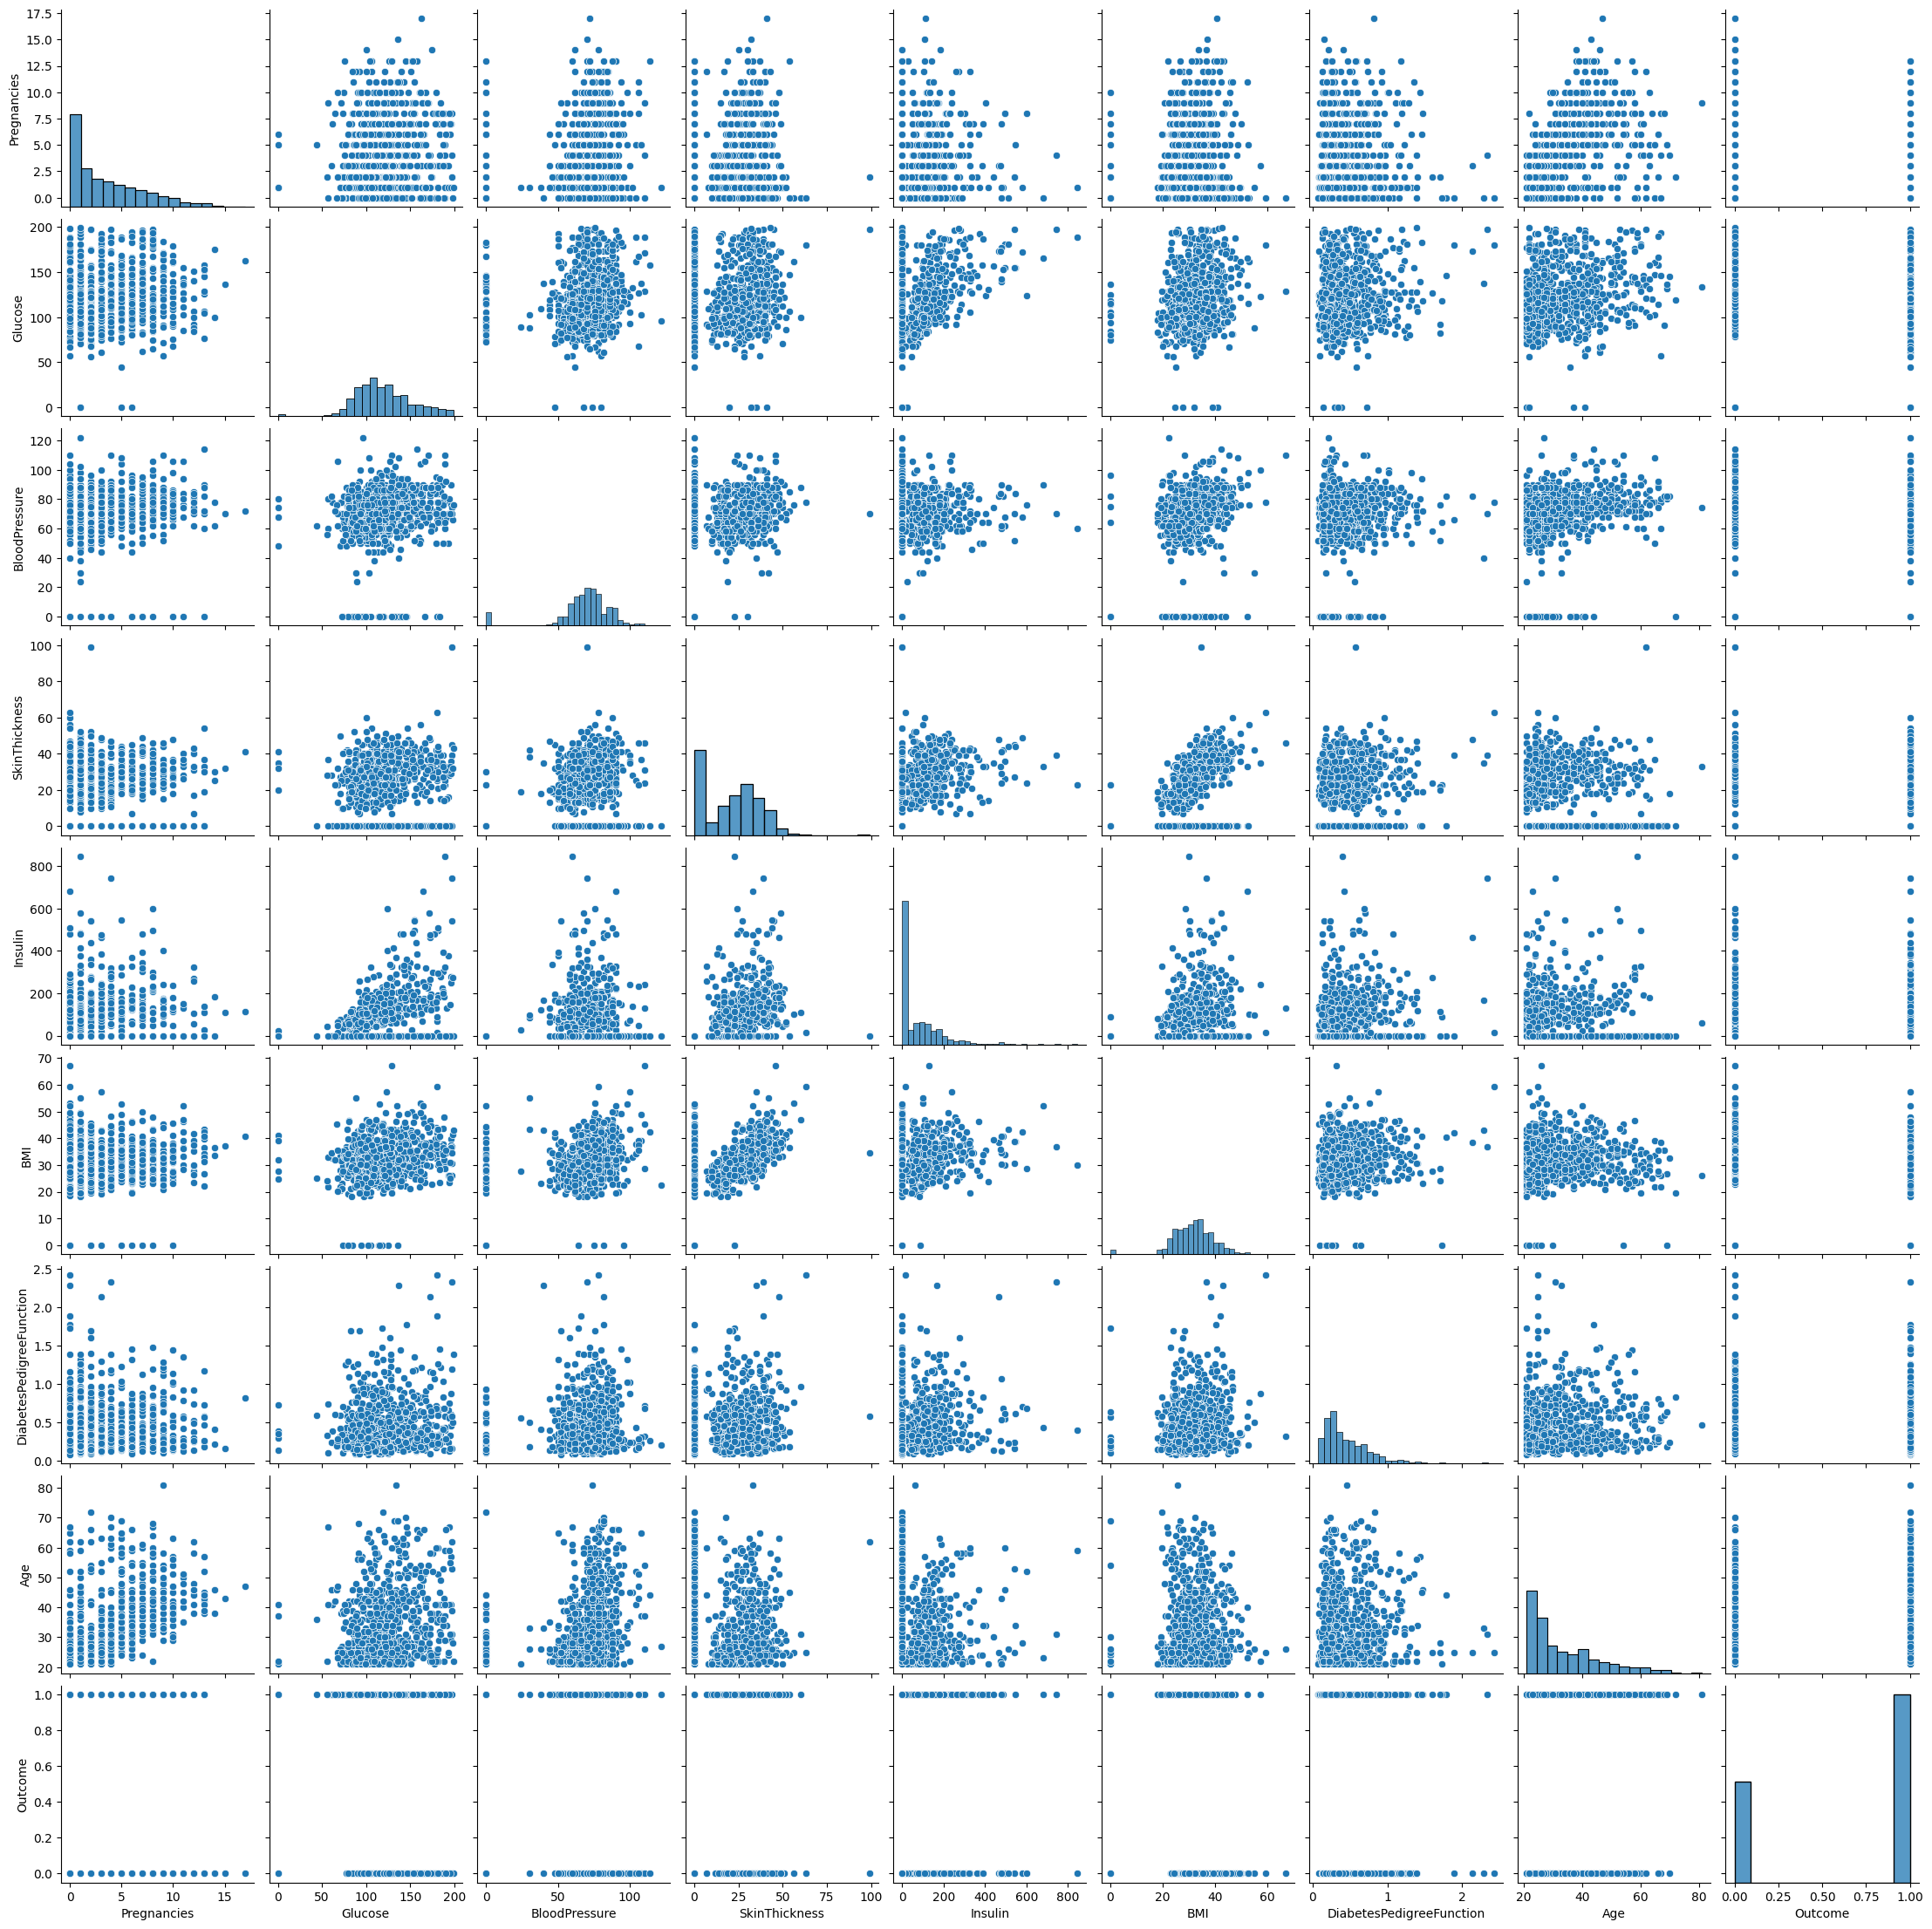

In [12]:
# Analysing all the Data at Once
sns.pairplot(data = total_data)

In [13]:
#Outlier analysis

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.651042
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


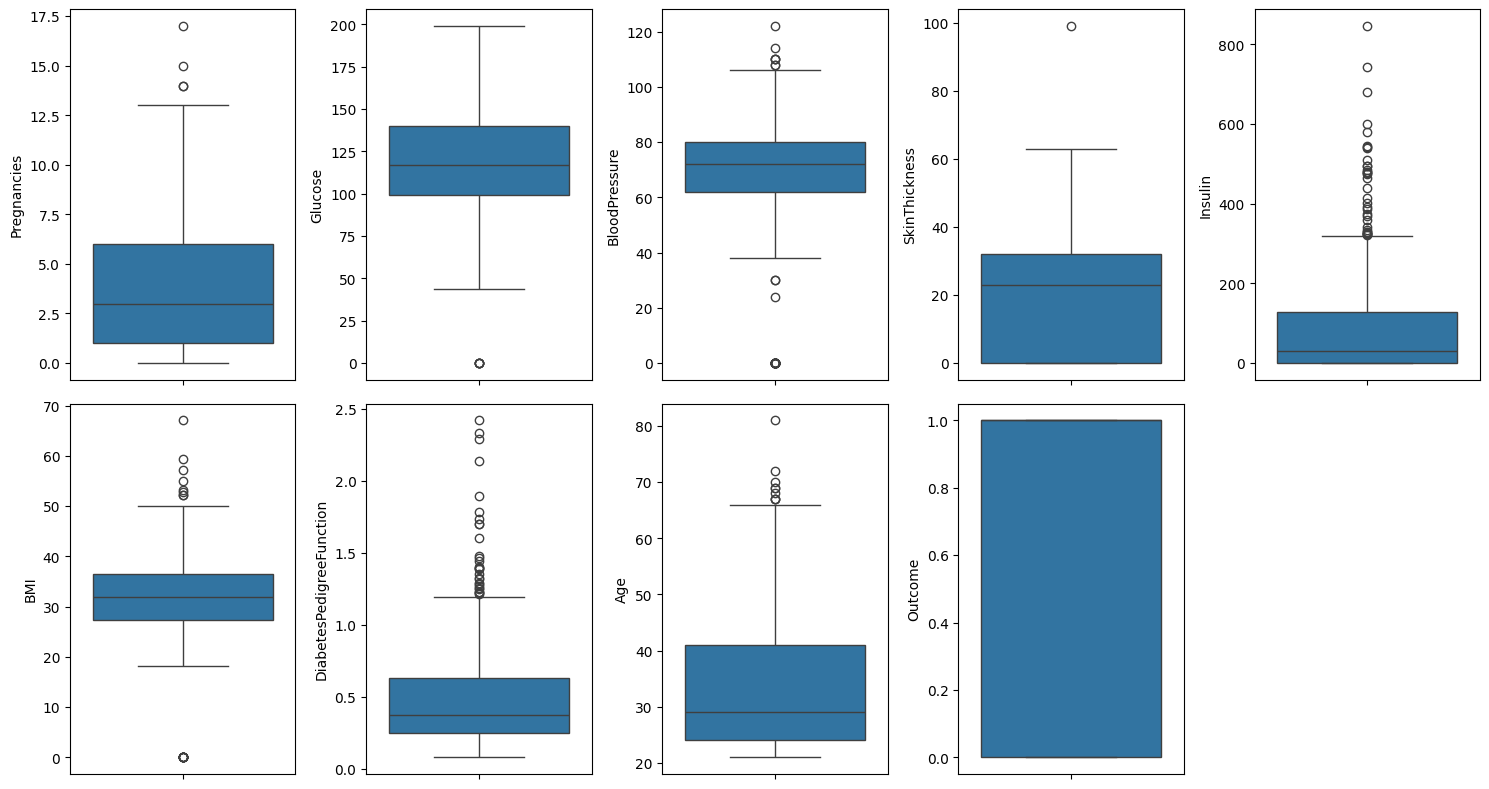

In [14]:

import warnings

# Desactivar todas las advertencias de DeprecationWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Factorize the Outcome Data

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

sns.boxplot(ax=axes[0, 0], data=total_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_data, y="BloodPressure")
sns.boxplot(ax=axes[0, 3], data=total_data, y="SkinThickness")
sns.boxplot(ax=axes[0, 4], data=total_data, y="Insulin")
sns.boxplot(ax=axes[1, 0], data=total_data, y="BMI")
sns.boxplot(ax=axes[1, 1], data=total_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 2], data=total_data, y="Age")
sns.boxplot(ax=axes[1, 3], data=total_data, y="Outcome")

fig.delaxes(axes[1, 4])

plt.tight_layout()


plt.show()

In [15]:
# Outlier detection for Pregnancies

Pregnancies_stats = total_data["Pregnancies"].describe()
Pregnancies_stats

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [16]:

# Calcular estadísticas para "Pregnancies"
Pregnancies_stats = total_data["Pregnancies"].describe()

# Calcular el rango intercuartílico (IQR) para "Pregnancies"
Pregnancies_iqr = Pregnancies_stats["75%"] - Pregnancies_stats["25%"]
upper_limit = Pregnancies_stats["75%"] + 1.5 * Pregnancies_iqr
lower_limit = Pregnancies_stats["25%"] - 1.5 * Pregnancies_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Pregnancies_iqr, 2)}")

# Filtrar outliers para "Pregnancies"
total_data = total_data[(total_data["Pregnancies"] >= lower_limit) & (total_data["Pregnancies"] <= upper_limit)]

# En resumen, esta línea de código ayuda a eliminar los valores atípicos para la variable "Pregnancies" de total_data, manteniendo solo las filas que cumplen
# con los criterios establecidos por el rango intercuartílico

# Imprimir la cantidad de valores atípicos removidos
count_outliers = total_data.shape[0] - Pregnancies_stats["count"]
print(f"Count of outliers removed: {count_outliers}")

The upper and lower limits for finding outliers are 13.5 and -6.5, with an interquartile range of 5.0
Count of outliers removed: -4.0


In [17]:
# Calcular estadísticas para "Glucose"
glucose_stats = total_data["Glucose"].describe()
glucose_iqr = glucose_stats["75%"] - glucose_stats["25%"]
upper_limit_glucose = glucose_stats["75%"] + 1.5 * glucose_iqr
lower_limit_glucose = glucose_stats["25%"] - 1.5 * glucose_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(glucose_iqr, 2)}")


total_data = total_data[(total_data["Glucose"] >= lower_limit_glucose) & (total_data["Glucose"] <= upper_limit_glucose)]
count_outliers_glucose = total_data.shape[0] - glucose_stats["count"]
print(f"Count of outliers removed for Glucose: {count_outliers_glucose}")

# Calcular estadísticas para "BloodPressure"
blood_pressure_stats = total_data["BloodPressure"].describe()
blood_pressure_iqr = blood_pressure_stats["75%"] - blood_pressure_stats["25%"]
upper_limit_bp = blood_pressure_stats["75%"] + 1.5 * blood_pressure_iqr
lower_limit_bp = blood_pressure_stats["25%"] - 1.5 * blood_pressure_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(blood_pressure_iqr, 2)}")

total_data = total_data[(total_data["BloodPressure"] >= lower_limit_bp) & (total_data["BloodPressure"] <= upper_limit_bp)]
count_outliers_bp = total_data.shape[0] - blood_pressure_stats["count"]
print(f"Count of outliers removed for BloodPressure: {count_outliers_bp}")

# Calcular estadísticas para "SkinThickness"
skin_thickness_stats = total_data["SkinThickness"].describe()
skin_thickness_iqr = skin_thickness_stats["75%"] - skin_thickness_stats["25%"]
upper_limit_skin = skin_thickness_stats["75%"] + 1.5 * skin_thickness_iqr
lower_limit_skin = skin_thickness_stats["25%"] - 1.5 * skin_thickness_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_skin, 2)} and {round(lower_limit_skin, 2)}, with an interquartile range of {round(skin_thickness_iqr, 2)}")

# Filtrar outliers para "SkinThickness"
total_data = total_data[(total_data["SkinThickness"] >= lower_limit_skin) & (total_data["SkinThickness"] <= upper_limit_skin)]
count_outliers_skin = total_data.shape[0] - skin_thickness_stats["count"]
print(f"Count of outliers removed for SkinThickness: {count_outliers_skin}")

# Calcular estadísticas para "Insulin"
insulin_stats = total_data["Insulin"].describe()
insulin_iqr = insulin_stats["75%"] - insulin_stats["25%"]
upper_limit_insulin = insulin_stats["75%"] + 1.5 * insulin_iqr
lower_limit_insulin = insulin_stats["25%"] - 1.5 * insulin_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_insulin, 2)} and {round(lower_limit_insulin, 2)}, with an interquartile range of {round(insulin_iqr, 2)}")

# Filtrar outliers para "Insulin"
total_data = total_data[(total_data["Insulin"] >= lower_limit_insulin) & (total_data["Insulin"] <= upper_limit_insulin)]
count_outliers_insulin = total_data.shape[0] - insulin_stats["count"]
print(f"Count of outliers removed for Insulin: {count_outliers_insulin}")

# Calcular estadísticas para "BMI"
bmi_stats = total_data["BMI"].describe()
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit_bmi = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit_bmi = bmi_stats["25%"] - 1.5 * bmi_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_bmi, 2)} and {round(lower_limit_bmi, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

# Filtrar outliers para "BMI"
total_data = total_data[(total_data["BMI"] >= lower_limit_bmi) & (total_data["BMI"] <= upper_limit_bmi)]
count_outliers_bmi = total_data.shape[0] - bmi_stats["count"]
print(f"Count of outliers removed for BMI: {count_outliers_bmi}")

# Calcular estadísticas para "DiabetesPedigreeFunction"
dpf_stats = total_data["DiabetesPedigreeFunction"].describe()
dpf_iqr = dpf_stats["75%"] - dpf_stats["25%"]
upper_limit_dpf = dpf_stats["75%"] + 1.5 * dpf_iqr
lower_limit_dpf = dpf_stats["25%"] - 1.5 * dpf_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_dpf, 2)} and {round(lower_limit_dpf, 2)}, with an interquartile range of {round(dpf_iqr, 2)}")

# Filtrar outliers para "DiabetesPedigreeFunction"
total_data = total_data[(total_data["DiabetesPedigreeFunction"] >= lower_limit_dpf) & (total_data["DiabetesPedigreeFunction"] <= upper_limit_dpf)]
count_outliers_dpf = total_data.shape[0] - dpf_stats["count"]
print(f"Count of outliers removed for DiabetesPedigreeFunction: {count_outliers_dpf}")

# Calcular estadísticas para "Age"
age_stats = total_data["Age"].describe()
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit_age = age_stats["75%"] + 1.5 * age_iqr
lower_limit_age = age_stats["25%"] - 1.5 * age_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_age, 2)} and {round(lower_limit_age, 2)}, with an interquartile range of {round(age_iqr, 2)}")

# Filtrar outliers para "Age"
total_data = total_data[(total_data["Age"] >= lower_limit_age) & (total_data["Age"] <= upper_limit_age)]
count_outliers_age = total_data.shape[0] - age_stats["count"]
print(f"Count of outliers removed for Age: {count_outliers_age}")

# Calcular estadísticas para "Outcome"
outcome_stats = total_data["Outcome"].describe()
outcome_iqr = outcome_stats["75%"] - outcome_stats["25%"]
upper_limit_outcome = outcome_stats["75%"] + 1.5 * outcome_iqr
lower_limit_outcome = outcome_stats["25%"] - 1.5 * outcome_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_outcome, 2)} and {round(lower_limit_outcome, 2)}, with an interquartile range of {round(outcome_iqr, 2)}")

# Filtrar outliers para "Outcome"
total_data = total_data[(total_data["Outcome"] >= lower_limit_outcome) & (total_data["Outcome"] <= upper_limit_outcome)]
count_outliers_outcome = total_data.shape[0] - outcome_stats["count"]
print(f"Count of outliers removed for Outcome: {count_outliers_outcome}")




The upper and lower limits for finding outliers are 13.5 and -6.5, with an interquartile range of 41.0
Count of outliers removed for Glucose: -5.0
The upper and lower limits for finding outliers are 13.5 and -6.5, with an interquartile range of 18.0
Count of outliers removed for BloodPressure: -45.0
The upper and lower limits for finding outliers are 82.5 and -49.5, with an interquartile range of 33.0
Count of outliers removed for SkinThickness: -1.0
The upper and lower limits for finding outliers are 330.0 and -198.0, with an interquartile range of 132.0
Count of outliers removed for Insulin: -27.0
The upper and lower limits for finding outliers are 49.6 and 13.8, with an interquartile range of 8.95
Count of outliers removed for BMI: -10.0
The upper and lower limits for finding outliers are 1.17 and -0.31, with an interquartile range of 0.37
Count of outliers removed for DiabetesPedigreeFunction: -29.0
The upper and lower limits for finding outliers are 65.25 and -0.75, with an interq

In [18]:
# Missing value analysis
total_data.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# No hace falta que escalemos los datos ni los factoricemos , directamente hacemos el guardado de train y test .
# Nuestra variable objetivo es Outcome.

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,83.0,66.0,50.0,32.2,0.497,22.0
1,10.0,129.0,76.0,122.0,35.9,0.280,39.0
2,8.0,151.0,78.0,210.0,42.9,0.516,36.0
3,9.0,122.0,56.0,0.0,33.3,1.114,33.0
4,5.0,106.0,82.0,0.0,39.5,0.286,38.0


In [20]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9.0,152.0,78.0,171.0,34.2,0.893,33.0
1,10.0,101.0,76.0,180.0,32.9,0.171,63.0
2,2.0,85.0,65.0,0.0,39.6,0.930,27.0
3,5.0,147.0,75.0,0.0,29.9,0.434,28.0
4,4.0,141.0,74.0,0.0,27.6,0.244,40.0


In [21]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [22]:
# Decision Tree model
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,83.0,66.0,50.0,32.2,0.497,22.0,1
1,10.0,129.0,76.0,122.0,35.9,0.280,39.0,1
2,8.0,151.0,78.0,210.0,42.9,0.516,36.0,0
3,9.0,122.0,56.0,0.0,33.3,1.114,33.0,0
4,5.0,106.0,82.0,0.0,39.5,0.286,38.0,1


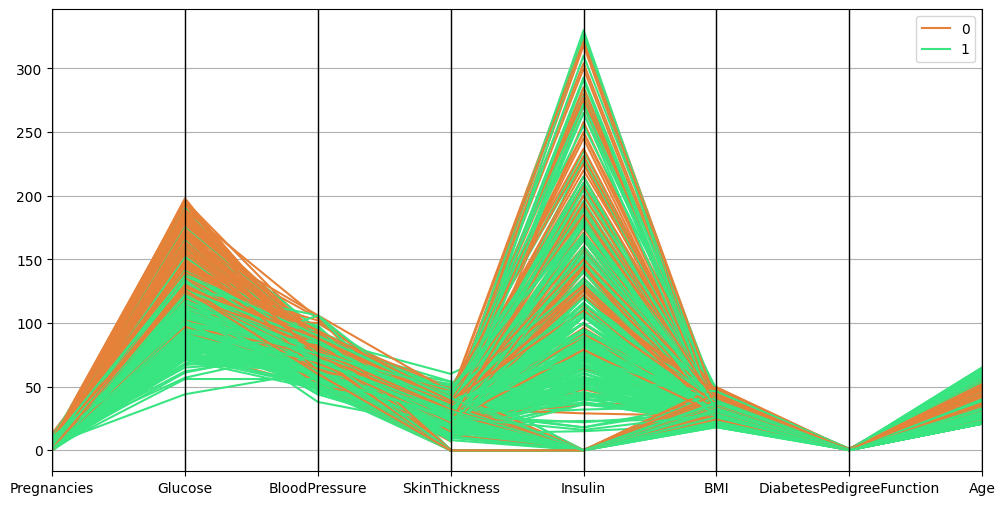

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [24]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]



Esta separación facilita el entrenamiento del modelo utilizando X_train e y_train y luego evaluar el rendimiento del modelo utilizando X_test e y_test. Al tener conjuntos de entrenamiento y prueba separados, podemos verificar cómo se desempeña el modelo en datos que no ha visto durante el entrenamiento, lo que es esencial para evaluar su capacidad de generalización.

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

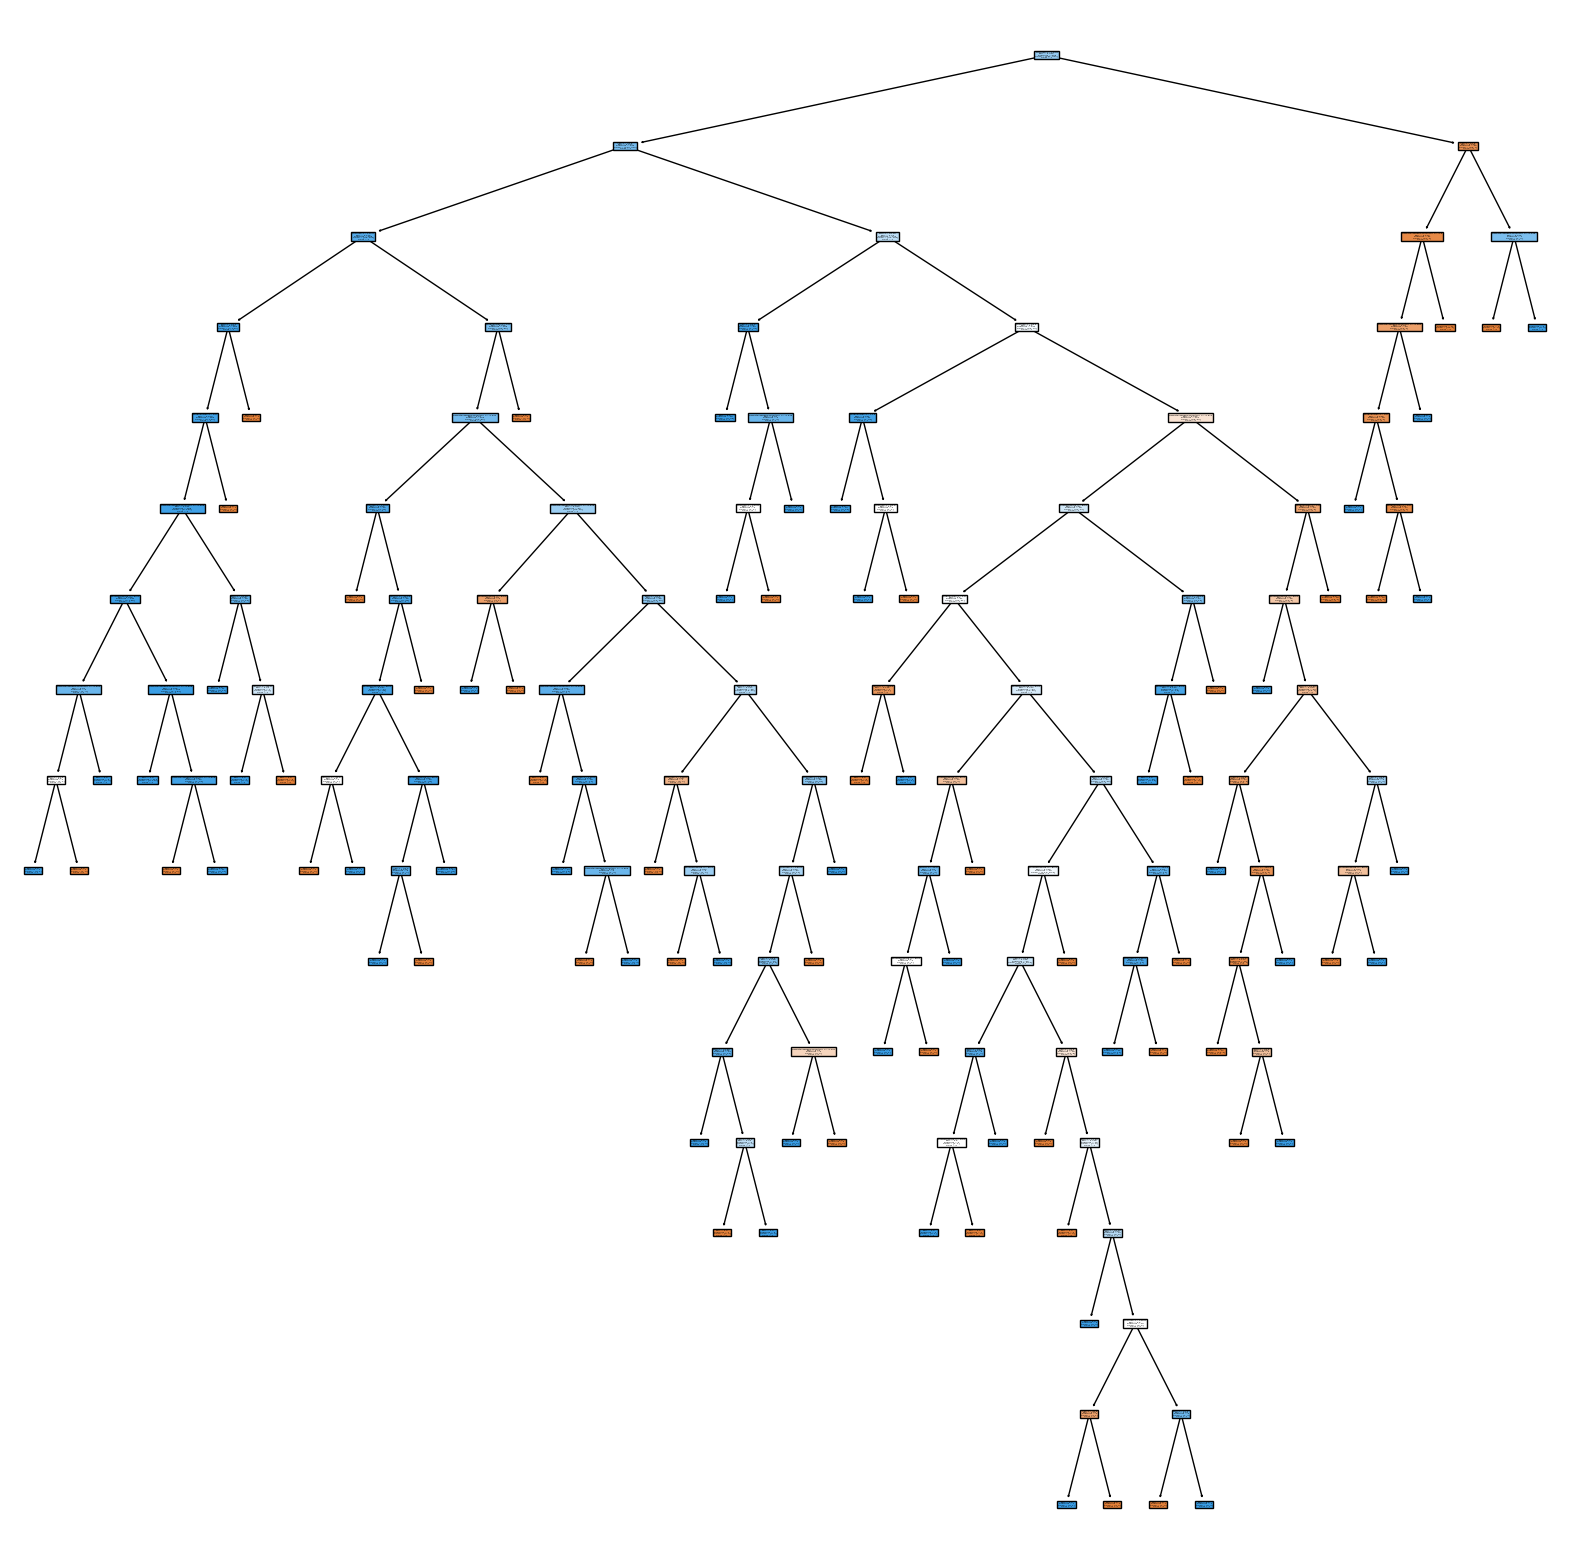

In [33]:
from sklearn import tree

fig = plt.figure(figsize=(20,20))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()


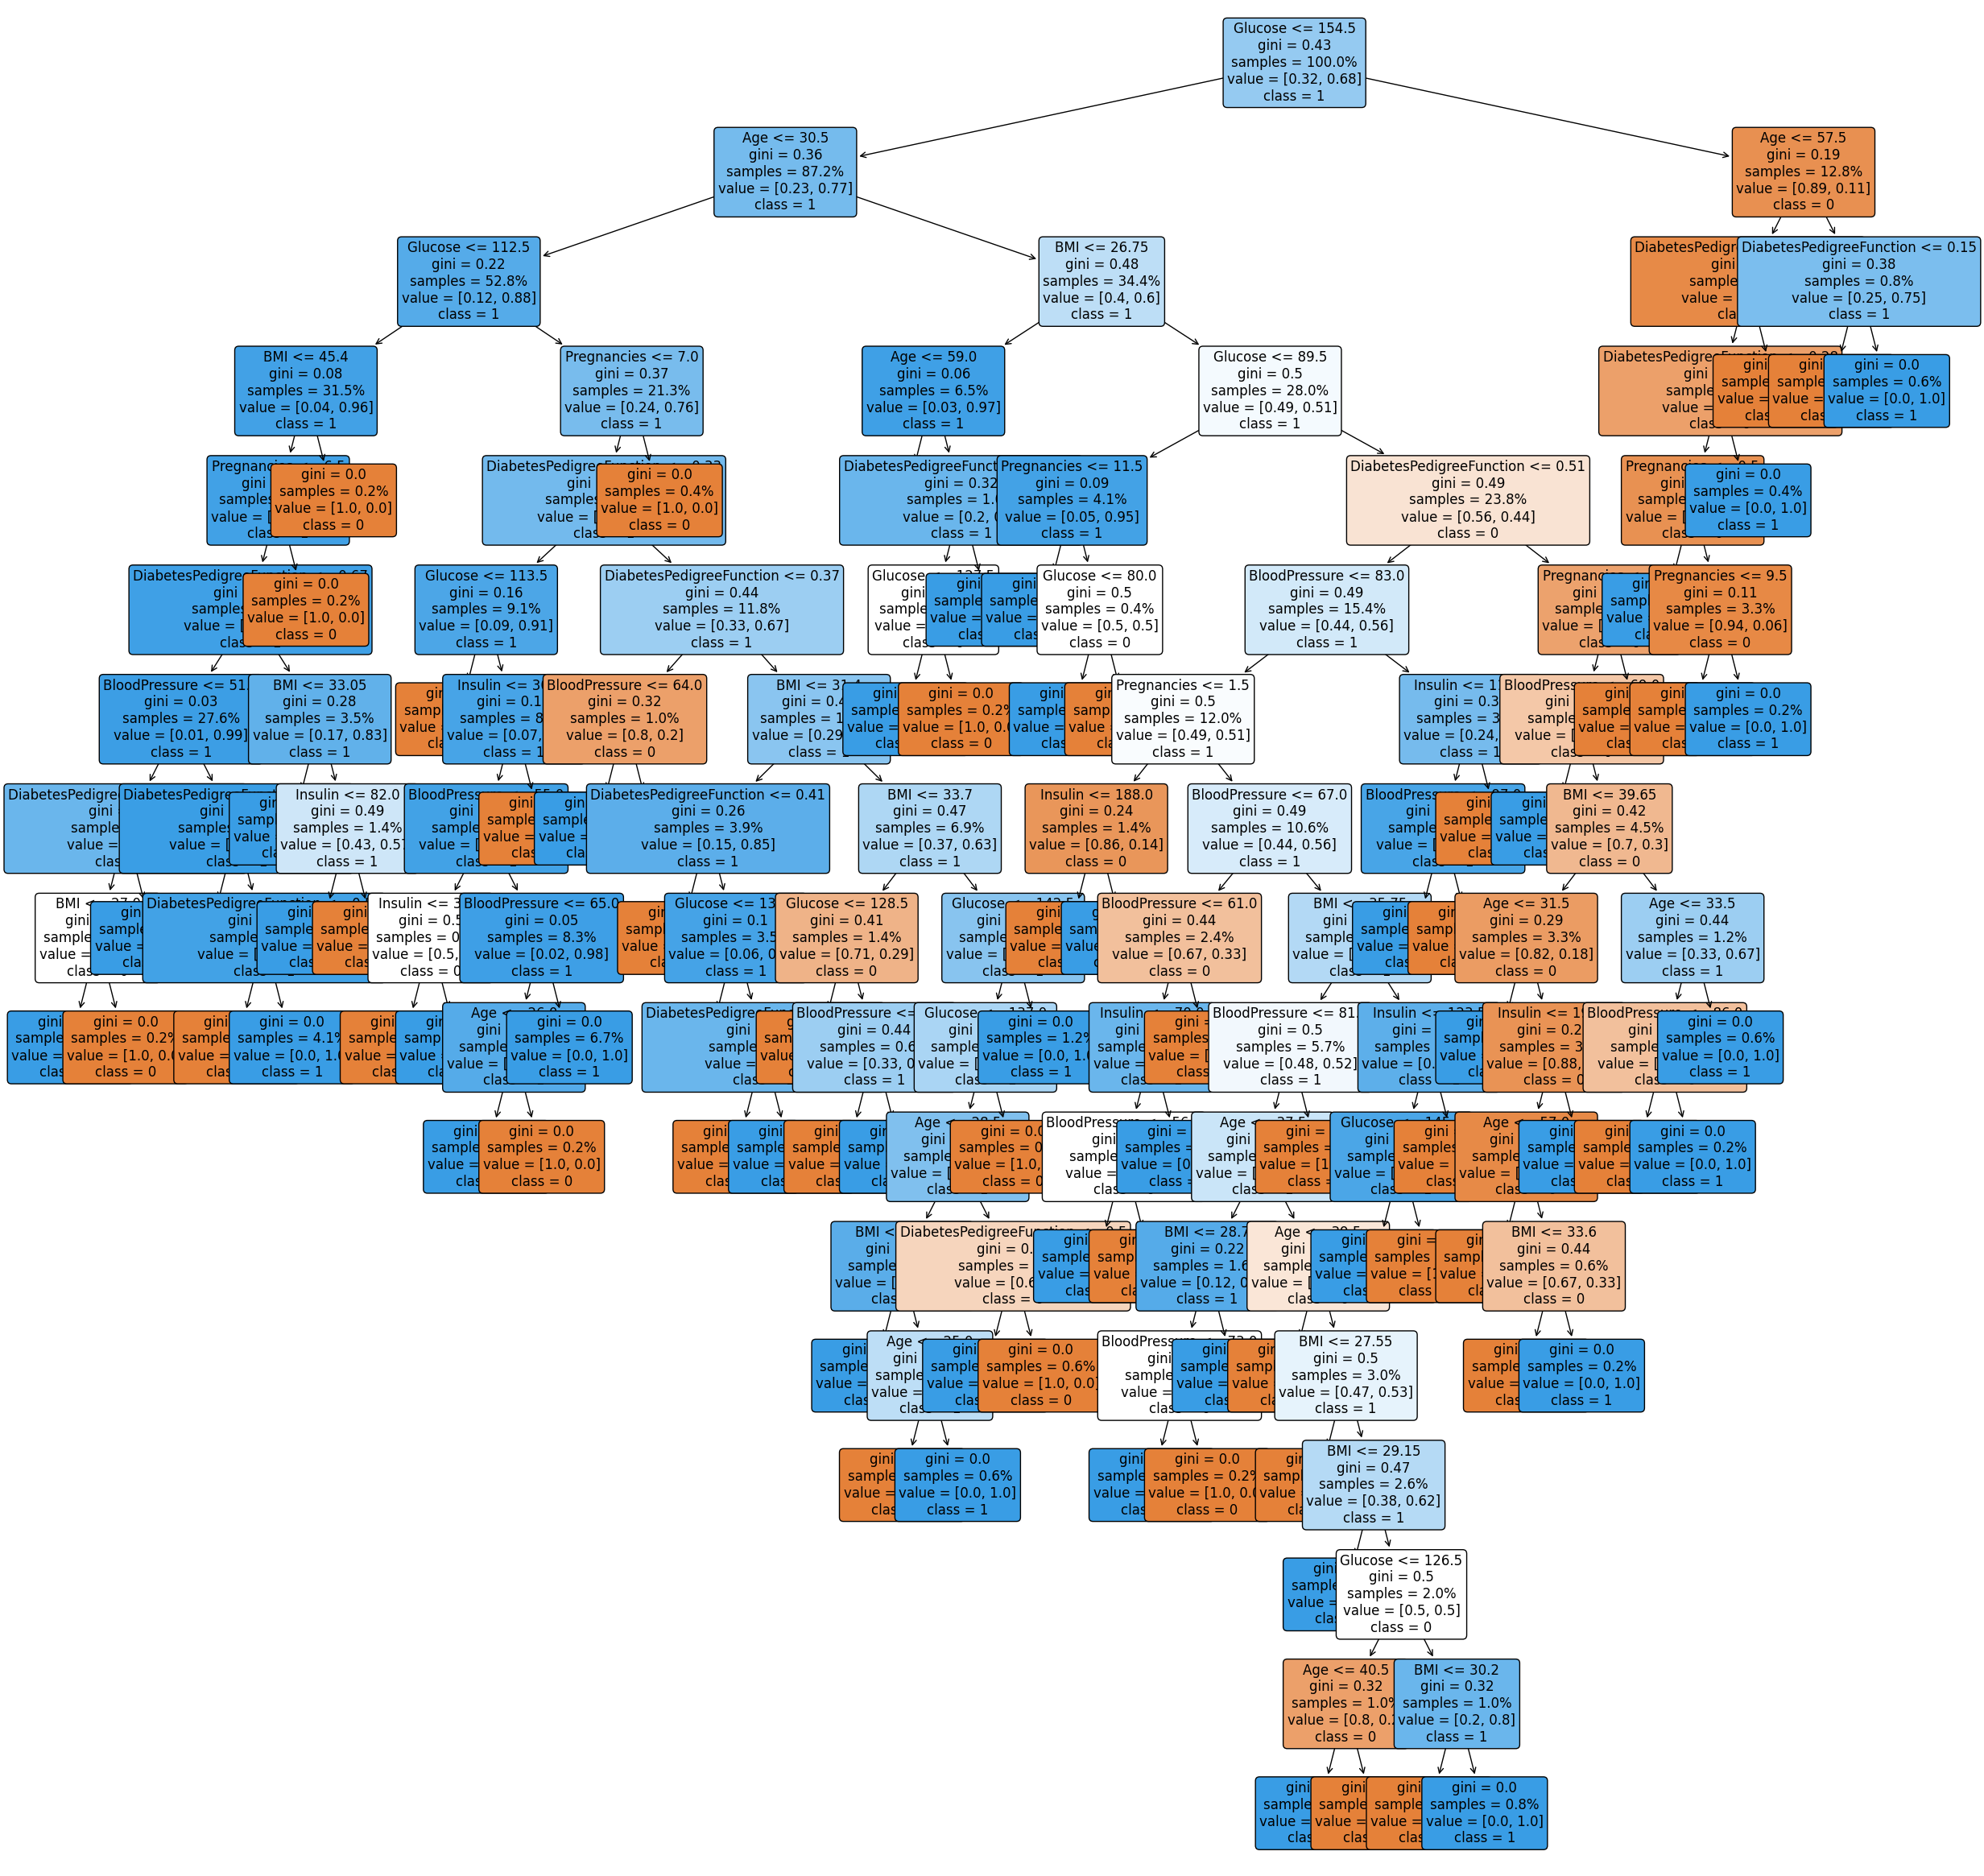

In [40]:
# Opcion para poder verlo mejor 

import matplotlib.pyplot as plt
from sklearn import tree


fig, axis = plt.subplots(figsize=(30, 30))


tree.plot_tree(model, 
               ax=axis, 
               feature_names=list(X_train.columns), 
               class_names=["0", "1"],
               filled=True, 
               rounded=True, 
               proportion=True, 
               precision=2, 
               fontsize=12)  # Ajusta el tamaño de la fuente

plt.show()

In [41]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7265625

In [44]:
# Guardamos 
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

In [43]:
# Model optimization
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [46]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [47]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.734375

In [ ]:
from pickle import dump

dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))